In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [2]:
fl = pd.read_csv("CO2 Emissions_Canada.csv")
fl

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [3]:
fl.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
fl.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [6]:
fl.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [7]:
fl['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [8]:
fl.drop(['Make', 'Model', 'Vehicle Class','Transmission'], axis=1)

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,Z,9.9,6.7,8.5,33,196
1,2.4,4,Z,11.2,7.7,9.6,29,221
2,1.5,4,Z,6.0,5.8,5.9,48,136
3,3.5,6,Z,12.7,9.1,11.1,25,255
4,3.5,6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
7380,2.0,4,Z,10.7,7.7,9.4,30,219
7381,2.0,4,Z,11.2,8.3,9.9,29,232
7382,2.0,4,Z,11.7,8.6,10.3,27,240
7383,2.0,4,Z,11.2,8.3,9.9,29,232


In [9]:
label_encoder = preprocessing.LabelEncoder()
  
fl['Fuel Type']= label_encoder.fit_transform(fl['Fuel Type'])
  
fl['Fuel Type'].unique()

array([4, 0, 3, 1, 2])

In [10]:
print(fl)

       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission  Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5          4                               9.9   
1              

In [11]:
cor = fl.corr()

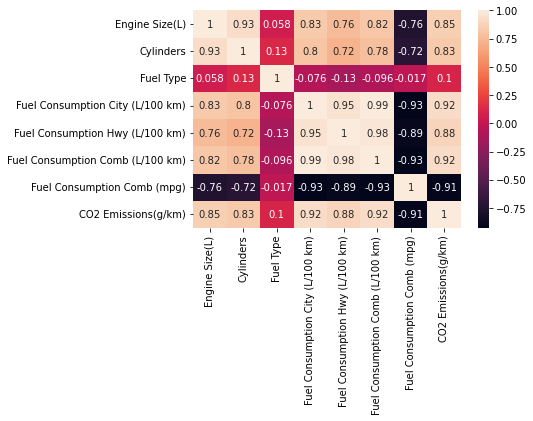

In [12]:
sns.heatmap(cor,annot=True)
plt.show()

In [13]:
fl.drop(['Fuel Type','Fuel Consumption Comb (mpg)'], axis=1)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,12.1,8.7,10.6,244
...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,10.7,7.7,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,11.2,8.3,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,11.7,8.6,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,11.2,8.3,9.9,232


In [14]:
col = fl.columns
print(col)

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


In [34]:
fl = fl.drop(['Make', 'Model', 'Vehicle Class','Transmission'],axis=1)


In [35]:
fl
   

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,4,9.9,6.7,8.5,33,196
1,2.4,4,4,11.2,7.7,9.6,29,221
2,1.5,4,4,6.0,5.8,5.9,48,136
3,3.5,6,4,12.7,9.1,11.1,25,255
4,3.5,6,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
7380,2.0,4,4,10.7,7.7,9.4,30,219
7381,2.0,4,4,11.2,8.3,9.9,29,232
7382,2.0,4,4,11.7,8.6,10.3,27,240
7383,2.0,4,4,11.2,8.3,9.9,29,232


In [36]:
col = fl.columns
print(col)

Index(['Engine Size(L)', 'Cylinders', 'Fuel Type',
       'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)',
       'CO2 Emissions(g/km)'],
      dtype='object')


/home/vectone/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


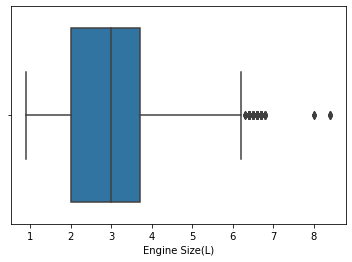

/home/vectone/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


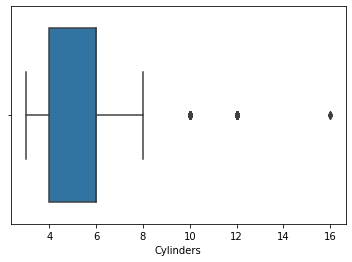

/home/vectone/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


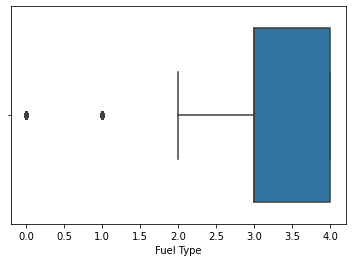

/home/vectone/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


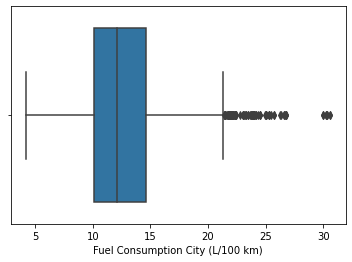

/home/vectone/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


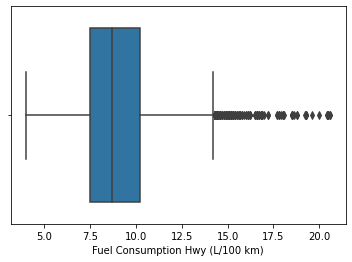

/home/vectone/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


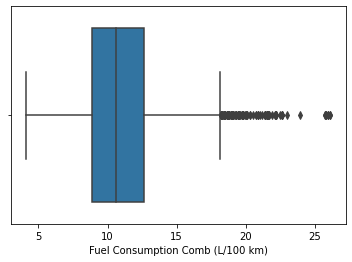

/home/vectone/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


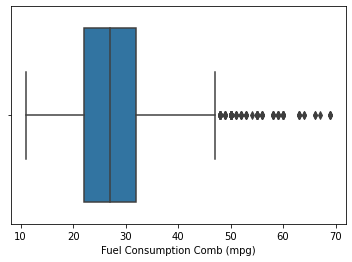

/home/vectone/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


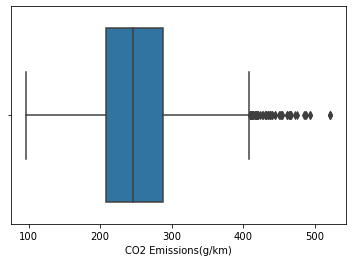

In [37]:
for i in col:
    sns.boxplot(fl[i])
    plt.show()

In [38]:
from sklearn.preprocessing import QuantileTransformer
quan = QuantileTransformer()
fl = quan.fit_transform(fl)
print(fl)
fl1 = pd.DataFrame(fl)
fl1.columns=['Engine Size(L)', 'Cylinders', 'Fuel Type','Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']
fl1

[[0.23323323 0.23073073 1.         ... 0.1956957  0.7987988  0.17817818]
 [0.36336336 0.23073073 1.         ... 0.35385385 0.62262262 0.33783784]
 [0.05055055 0.23073073 1.         ... 0.01451451 0.98548549 0.01301301]
 ...
 [0.23323323 0.23073073 1.         ... 0.45995996 0.51751752 0.46296296]
 [0.23323323 0.23073073 1.         ... 0.4009009  0.62262262 0.41391391]
 [0.23323323 0.23073073 1.         ... 0.52202202 0.45595596 0.51601602]]


,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0.233233,0.230731,1.0,0.231231,0.120621,0.195696,0.798799,0.178178
1,0.363363,0.230731,1.0,0.390390,0.290791,0.353854,0.622623,0.337838
2,0.050551,0.230731,1.0,0.016016,0.023524,0.014515,0.985485,0.013013
3,0.631632,0.618118,1.0,0.580581,0.574074,0.581081,0.393393,0.562563
4,0.631632,0.618118,1.0,0.503003,0.503504,0.506507,0.517518,0.489489
...,...,...,...,...,...,...,...,...
7380,0.233233,0.230731,1.0,0.324825,0.290791,0.322823,0.676677,0.322322
7381,0.233233,0.230731,1.0,0.390390,0.414915,0.400901,0.622623,0.413914
7382,0.233233,0.230731,1.0,0.448949,0.482482,0.459960,0.517518,0.462963
7383,0.233233,0.230731,1.0,0.390390,0.414915,0.400901,0.622623,0.413914


/home/vectone/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


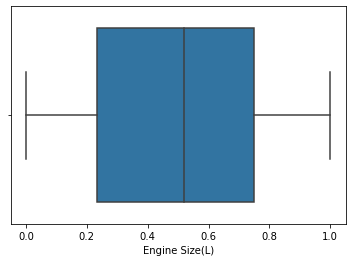

/home/vectone/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


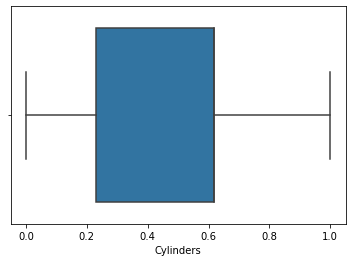

/home/vectone/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


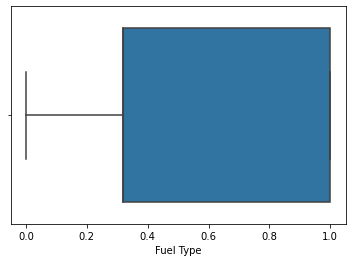

/home/vectone/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


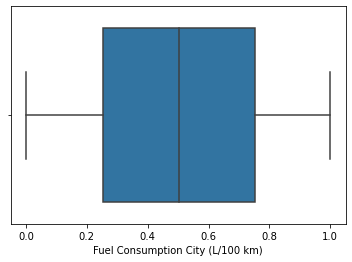

/home/vectone/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


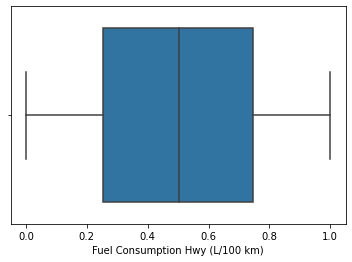

/home/vectone/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


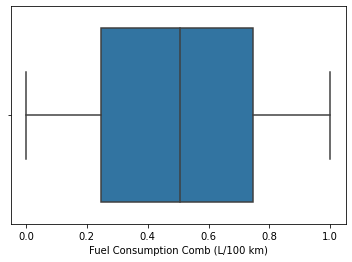

/home/vectone/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


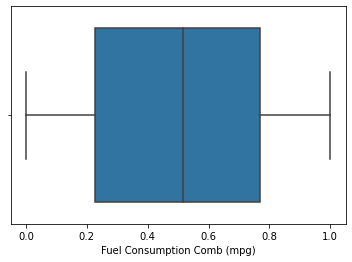

/home/vectone/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


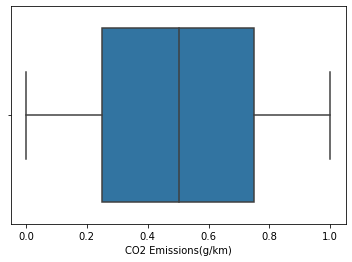

In [39]:
for i in col:
    sns.boxplot(fl1[i])
    plt.show()

In [41]:
fl1.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Type',
       'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)',
       'CO2 Emissions(g/km)'],
      dtype='object')

In [71]:
x = fl1[['Engine Size(L)','Cylinders','Fuel Type','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)']]
y = fl1["CO2 Emissions(g/km)"]


print(x.count())
print(y.count())

Engine Size(L)                      7385
Cylinders                           7385
Fuel Type                           7385
Fuel Consumption City (L/100 km)    7385
Fuel Consumption Hwy (L/100 km)     7385
Fuel Consumption Comb (L/100 km)    7385
Fuel Consumption Comb (mpg)         7385
dtype: int64
7385


In [72]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=42)

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

ln = LinearRegression()
xg = xgb.XGBRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

ln.fit(xtrain,ytrain)
xg.fit(xtrain,ytrain)
dt.fit(xtrain,ytrain)
rf.fit(xtrain,ytrain)

ln_pred = ln.predict(xtest)
xg_pred = xg.predict(xtest)
dt_pred = dt.predict(xtest)
rf_pred = rf.predict(xtest)


In [79]:
from sklearn.metrics import r2_score
ln_score = r2_score(ytest,ln_pred)
xg_score = r2_score(ytest,xg_pred)
dt_score = r2_score(ytest,dt_pred)
rf_score = r2_score(ytest,rf_pred)



print("Accuracy score of linear regression: {}".format(ln_score))
print("Accuracy score of xgboost regression: {}".format(xg_score))
print("Accuracy score of decision tree regression:{}".format(dt_score))
print("Accuracy score of random forest regression:{}".format(rf_score))



Accuracy score of linear regression: 0.9320711314701591
Accuracy score of xgboost regression: 0.9979343092150148
Accuracy score of decision tree regression:0.9972151879940323
Accuracy score of random forest regression:0.9977009444272958
